<a href="https://colab.research.google.com/github/Blake2912/Vahini-2.0/blob/simulation-main/simulation/Simulation_%26_Marker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [48]:
!pip install osmnx networkx shapely ipyleaflet ipywidgets -q

from time import sleep
import urllib.request
import osmnx as ox
import networkx as nx
import ipyleaflet as ipl
from time import sleep
import pickle
import shapely
from shapely.geometry import Polygon
from ipyleaflet import Map, Marker, FullScreenControl, AwesomeIcon
from ipywidgets import interact
from time import sleep

url = "https://github.com/Blake2912/Vahini-2.0/raw/simulation-main/output/Trees_Final.pkl"
urllib.request.urlretrieve(url, "Trees_Final.pkl")
filename = "/content/Trees_Final.pkl"

with open(filename, "rb") as f:
    G = pickle.load(f)

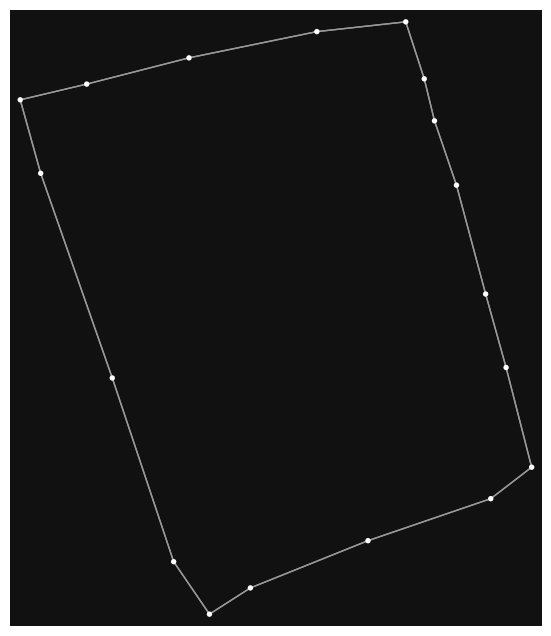

In [49]:
# Plotting the Graph
fig, ax = ox.plot_graph(G)

## Map Setup

In [50]:
# Plotting the interactive map with the center at (12.96682, 77.71231) => This center is for the map plotting not related with the graph
center = (12.96682, 77.71231)
m1 = ipl.Map(center=center, basemap=ipl.basemaps.CartoDB.Positron, zoom=18)
m1.layout.height = '800px'

### Trees

In [51]:
import re
# Setting up trees on the path
pattern = r't\-[0-9]+'
for point_name in list(G.nodes()):
    if re.match(pattern, point_name):
        # Get the latitude and longitude of the node
        latitude = G.nodes[point_name]['y']
        longitude = G.nodes[point_name]['x']
        # Draw circle for the point
        circle = ipl.Circle(
            location=(latitude, longitude),
            radius=2,
            color="tomato",
        )
        m1.add_layer(circle)

In [52]:
m1

Map(center=[12.96682, 77.71231], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

### Truck

In [53]:
# Adding markers in the interactive map
icon1 = AwesomeIcon(
    name='fa-truck',
    marker_color='green',
    icon_color='black',
    spin=False
)

marker = ipl.Marker(icon=icon1, location=[G.nodes['basic_science']['y'],G.nodes['basic_science']['x']])
m1.add_layer(marker)
m1

Map(center=[12.96682, 77.71231], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', '…

## Animation of Shortest Path Traveral

In [54]:
# Moving the marker according to the shortest path
display(m1)
orig_node = "basic_science"
marker.location = (G.nodes[orig_node]['y'], G.nodes[orig_node]['x'])
dest_node = "hostel_turn"
shortest_route = nx.shortest_path(G, orig_node, dest_node, weight='length')
locations = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_route]
lines = ipl.Polyline(
    locations=locations,
    color="tomato",
    fill=False
)
m1.add_layer(lines)


step = 0.5 # Speed can be varied here... higher the value lower the speed
for point in shortest_route:
    # Get the latitude and longitude of the node
    latitude = G.nodes[point]['y']
    longitude = G.nodes[point]['x']
    marker.location = (latitude, longitude)
    if re.match(pattern, point):
        # Tree encountered
        sleep(1)
        visited = ipl.Circle(
            location=(latitude, longitude),
            radius=2,
            color="#00b521",
            fill_color="#7fff96",
            fill=True,
            fill_opacity=0.85
        )
        m1.add_layer(visited)
  
sleep(step)

Map(bottom=31116739.0, center=[12.96682, 77.71231], controls=(ZoomControl(options=['position', 'zoom_in_text',…

## Misc.

In [55]:
# Finding the longest path with the given start and end nodes

longest_path = []
for i in range(len(shortest_route) - 1):
    start = shortest_route[i]
    end = shortest_route[i+1]
    G.remove_edge(start, end)
    for path in nx.all_simple_paths(G, start, end):
        if len(path) > len(longest_path):
            longest_path = path
    G.add_edge(start, end)

longest_route_map = ox.plot_route_folium(G, longest_path)
longest_route_map